In [1]:
def remove_outliers(df, k=2):
    '''
    This function is to remove the top 25% and bottom 25% of the data for each column.
    This removes the top and bottom 50% for every column to ensure all outliers are gone.
    '''
    a=[]
    b=[]
    fences=[a, b]
    features= []
    col_list = []
    i=0
    for col in df:
            new_df=np.where(df[col].nunique()>8, True, False)
            if new_df==True:
                if df[col].dtype == 'float' or df[col].dtype == 'int':
                    '''
                    for each feature find the first and third quartile
                    '''
                    q1, q3 = df[col].quantile([.25, .75])
                    '''
                    calculate inter quartile range
                    '''
                    iqr = q3 - q1
                    '''
                    calculate the upper and lower fence
                    '''
                    upper_fence = q3 + (k * iqr)
                    lower_fence = q1 - (k * iqr)
                    '''
                    appending the upper and lower fences to lists
                    '''
                    a.append(upper_fence)
                    b.append(lower_fence)
                    '''
                    appending the feature names to a list
                    '''
                    features.append(col)
                    '''
                    assigning the fences and feature names to a dataframe
                    '''
                    var_fences= pd.DataFrame(fences, columns=features, index=['upper_fence', 'lower_fence'])
                    col_list.append(col)
                else:
                    print(col)
                    print('column is not a float or int')
            else:
                print(f'{col} column ignored')
    '''
    for loop used to remove the data deemed unecessary
    '''
    for col in col_list:
        df = df[(df[col]<= a[i]) & (df[col]>= b[i])]
        i+=1
    return df, var_fences



In [2]:
# imports

import numpy as np
import pandas as pd
import seaborn as sns
import itertools
from pydataset import data

from env import get_connection
import prepare as p

import matplotlib.pyplot as plt
%matplotlib inline

# Continuous Probability Exercises


    Identify if any columns in lemonade.csv are normally distributed. For normally distributed columns:


In [3]:
# obtaining .csv

url = ('https://gist.githubusercontent.com/ryanorsinger/19bc7eccd6279661bd13307026628ace/raw/e4b5d6787015a4782f96cad6d1d62a8bdbac54c7/lemonade.csv')
    
lem = pd.read_csv(url)

In [4]:
# looking at .csv df

lem.head(3)

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15


In [5]:
lem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         365 non-null    object 
 1   Day          365 non-null    object 
 2   Temperature  365 non-null    float64
 3   Rainfall     365 non-null    float64
 4   Flyers       365 non-null    int64  
 5   Price        365 non-null    float64
 6   Sales        365 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 20.1+ KB


In [6]:
# changing to 'Date' col to datetime 

lem = p.to_datetime(lem, 'Date')
lem.head()

,Day,Temperature,Rainfall,Flyers,Price,Sales,month,day
Date,,,,,,,,
2017-01-01,Sunday,27.0,2.00,15,0.5,10,1,1
2017-01-02,Monday,28.9,1.33,15,0.5,13,1,2
2017-01-03,Tuesday,34.5,1.33,27,0.5,15,1,3
2017-01-04,Wednesday,44.1,1.05,28,0.5,17,1,4
2017-01-05,Thursday,42.4,1.00,33,0.5,18,1,5


### 1. Define a function named ```get_lower_and_upper_bounds``` that has two arguments. The first argument is a pandas Series. The second argument is the multiplier, which should have a default argument of 1.5.

In [7]:
# looking at 25th & 75th quantiles

q1, q3 = lem['Flyers'].quantile([0.25, 0.75])
q1, q3

(31.0, 49.0)

In [8]:
# column IQR
    
col_iqr = q3 - q1
col_iqr

18.0

In [9]:
# finding upper and lower bounds
k = 1.5   

col_lower = q1 - k * col_iqr
col_upper = q3 + k * col_iqr

col_lower, col_upper

(4.0, 76.0)

In [10]:
lem.head()

,Day,Temperature,Rainfall,Flyers,Price,Sales,month,day
Date,,,,,,,,
2017-01-01,Sunday,27.0,2.00,15,0.5,10,1,1
2017-01-02,Monday,28.9,1.33,15,0.5,13,1,2
2017-01-03,Tuesday,34.5,1.33,27,0.5,15,1,3
2017-01-04,Wednesday,44.1,1.05,28,0.5,17,1,4
2017-01-05,Thursday,42.4,1.00,33,0.5,18,1,5


In [11]:
# upper- & lower-bounds function

def get_lower_and_upper_bounds(df, col, k = 1.5):
    
    # looking at 25th & 75th quantiles
    q1, q3 = df[col].quantile([0.25, 0.75])

    #  IQR 
    col_iqr = q3 - q1

        # finding upper and lower bounds
    col_lower = q1 - k * col_iqr
    col_upper = q3 + k * col_iqr

    return (f'{col}, Q1 : {q1}, Q3 : {q3}, Column lower bound : {round(col_lower, 4)}, ' +
                 f'Column upper bound : {col_upper}')

In [12]:
# returning function 
get_lower_and_upper_bounds(lem, 'Flyers', k = 1.5)

'Flyers, Q1 : 31.0, Q3 : 49.0, Column lower bound : 4.0, Column upper bound : 76.0'

In [13]:
# function variables
q1, q3, col_lower, col_upper

(31.0, 49.0, 4.0, 76.0)

In [14]:
# upper & lower bounds for 'Rainfall'

get_lower_and_upper_bounds(lem, 'Rainfall', k = 1.5)

'Rainfall, Q1 : 0.65, Q3 : 0.91, Column lower bound : 0.26, Column upper bound : 1.3'

In [15]:
lem_list = ['Temperature', 'Rainfall', 'Flyers', 'Price', 'Sales']


In [16]:
def print_list_lower_upper_bounds(df, my_list, k):
    
    for col in lem_list:
    
        print(get_lower_and_upper_bounds(lem, col, k))

In [17]:
print_list_lower_upper_bounds(lem, lem_list, 1.5)

Temperature, Q1 : 49.7, Q3 : 71.7, Column lower bound : 16.7, Column upper bound : 104.7
Rainfall, Q1 : 0.65, Q3 : 0.91, Column lower bound : 0.26, Column upper bound : 1.3
Flyers, Q1 : 31.0, Q3 : 49.0, Column lower bound : 4.0, Column upper bound : 76.0
Price, Q1 : 0.5, Q3 : 0.5, Column lower bound : 0.5, Column upper bound : 0.5
Sales, Q1 : 20.0, Q3 : 30.0, Column lower bound : 5.0, Column upper bound : 45.0


In [73]:
# upper, lower, quantiles for columns

lem_list = ['Temperature', 'Rainfall', 'Flyers', 'Price', 'Sales']

for col in lem_list:
    
    print(get_lower_and_upper_bounds(lem, col, k = 1.5))

Temperature, Q1 : 49.7, Q3 : 71.3, Column lower bound : 17.3, Column upper bound : 103.69999999999999
Rainfall, Q1 : 0.65, Q3 : 0.91, Column lower bound : 0.26, Column upper bound : 1.3
Flyers, Q1 : 31.0, Q3 : 49.0, Column lower bound : 4.0, Column upper bound : 76.0
Price, Q1 : 0.5, Q3 : 0.5, Column lower bound : 0.5, Column upper bound : 0.5
Sales, Q1 : 20.0, Q3 : 30.0, Column lower bound : 5.0, Column upper bound : 45.0


In [19]:
# upper & lower bounds function

def find_out_of_upper_lower_bounds(df, col, k = 1.5):
    
    #finding the quantiles for a particular column
    q1, q3 = df[col].quantile([0.25, 0.75])
    
    # make iqr
    col_iqr = q3 - q1
    
    # set upper outlier boundary
    upper_bound = q3 + k * col_iqr
    
    # set lower outlier boundary
    lower_bound = q1 - k * col_iqr

    return (np.where(df[col] > upper_bound, 1, 0)), (np.where(df[col] < lower_bound, 1, 0))

### 2. Using lemonade.csv dataset and focusing on continuous variables:
        Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of  lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense? Which outliers to keep ?

In [20]:
# determing whether any 'Flyers' is above the upper bound or the lower bound

find_out_of_upper_lower_bounds(lem, 'Flyers', k = 1.5)

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [41]:

lem_list = ['Temperature', 'Rainfall', 'Flyers', 'Price', 'Sales']
    
def create_outliers_columns(df, my_list):

    # assigning new columns to dataframe based on above function


    #def lem_upper_lower():
    for col in lem_list:

        lem[f'{col}_upper_outliers'], lem[f'{col}_lower_outliers'] = find_out_of_upper_lower_bounds(lem, 
                                                                                                    col, k = 1.5)
    return lem

In [42]:
create_outliers_columns(lem, lem_list)

,Day,Temperature,Rainfall,Flyers,Price,Sales,month,day,Temperature_upper_outliers,Temperature_lower_outliers,Rainfall_upper_outliers,Rainfall_lower_outliers,Flyers_upper_outliers,Flyers_lower_outliers,Price_upper_outliers,Price_lower_outliers,Sales_upper_outliers,Sales_lower_outliers
Date,,,,,,,,,,,,,,,,,,
2017-01-01,Sunday,27.0,2.00,15,0.5,10,1,1,0,0,1,0,0,0,0,0,0,0
2017-01-02,Monday,28.9,1.33,15,0.5,13,1,2,0,0,1,0,0,0,0,0,0,0
2017-01-03,Tuesday,34.5,1.33,27,0.5,15,1,3,0,0,1,0,0,0,0,0,0,0
2017-01-04,Wednesday,44.1,1.05,28,0.5,17,1,4,0,0,0,0,0,0,0,0,0,0
2017-01-05,Thursday,42.4,1.00,33,0.5,18,1,5,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-27,Wednesday,42.7,1.00,33,0.5,19,12,27,0,0,0,0,0,0,0,0,0,0
2017-12-28,Thursday,37.8,1.25,32,0.5,16,12,28,0,0,0,0,0,0,0,0,0,0
2017-12-29,Friday,39.5,1.25,17,0.5,15,12,29,0,0,0,0,0,0,0,0,0,0


In [24]:
# assigning new columns to dataframe based on above function

lem_list = ['Temperature', 'Rainfall', 'Flyers', 'Price', 'Sales']

#def lem_upper_lower():
for col in lem_list:
    
    lem[f'{col}_upper_outliers'], lem[f'{col}_lower_outliers'] = find_out_of_upper_lower_bounds(lem, 
                                                                                                col, k = 1.5)
lem

,Day,Temperature,Rainfall,Flyers,Price,Sales,month,day,Temperature_upper_outliers,Temperature_lower_outliers,Rainfall_upper_outliers,Rainfall_lower_outliers,Flyers_upper_outliers,Flyers_lower_outliers,Price_upper_outliers,Price_lower_outliers,Sales_upper_outliers,Sales_lower_outliers
Date,,,,,,,,,,,,,,,,,,
2017-01-01,Sunday,27.0,2.00,15,0.5,10,1,1,0,0,1,0,0,0,0,0,0,0
2017-01-02,Monday,28.9,1.33,15,0.5,13,1,2,0,0,1,0,0,0,0,0,0,0
2017-01-03,Tuesday,34.5,1.33,27,0.5,15,1,3,0,0,1,0,0,0,0,0,0,0
2017-01-04,Wednesday,44.1,1.05,28,0.5,17,1,4,0,0,0,0,0,0,0,0,0,0
2017-01-05,Thursday,42.4,1.00,33,0.5,18,1,5,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-27,Wednesday,42.7,1.00,33,0.5,19,12,27,0,0,0,0,0,0,0,0,0,0
2017-12-28,Thursday,37.8,1.25,32,0.5,16,12,28,0,0,0,0,0,0,0,0,0,0
2017-12-29,Friday,39.5,1.25,17,0.5,15,12,29,0,0,0,0,0,0,0,0,0,0


In [44]:
lem.head(3).T

Date,2017-01-01,2017-01-02,2017-01-03
Day,Sunday,Monday,Tuesday
Temperature,27.0,28.9,34.5
Rainfall,2.0,1.33,1.33
Flyers,15,15,27
Price,0.5,0.5,0.5
Sales,10,13,15
month,1,1,1
day,1,2,3
Temperature_upper_outliers,0,0,0
Temperature_lower_outliers,0,0,0


In [25]:
# upper, lower, quantiles for columns

lem_list = ['Temperature', 'Rainfall', 'Flyers', 'Price', 'Sales']

for col in lem_list:
    
    print(get_lower_and_upper_bounds(lem, col, k = 1.5))

Temperature, Q1 : 49.7, Q3 : 71.7, Column lower bound : 16.7, Column upper bound : 104.7
Rainfall, Q1 : 0.65, Q3 : 0.91, Column lower bound : 0.26, Column upper bound : 1.3
Flyers, Q1 : 31.0, Q3 : 49.0, Column lower bound : 4.0, Column upper bound : 76.0
Price, Q1 : 0.5, Q3 : 0.5, Column lower bound : 0.5, Column upper bound : 0.5
Sales, Q1 : 20.0, Q3 : 30.0, Column lower bound : 5.0, Column upper bound : 45.0


In [26]:
# loooking at continuous columsn

lem.describe()[lem_list]

,Temperature,Rainfall,Flyers,Price,Sales
count,365.000000,365.000000,365.000000,365.0,365.000000
mean,61.224658,0.825973,40.104110,0.5,27.865753
std,18.085892,0.273890,13.786445,0.0,30.948132
min,15.100000,0.400000,-38.000000,0.5,7.000000
25%,49.700000,0.650000,31.000000,0.5,20.000000
50%,61.100000,0.740000,39.000000,0.5,25.000000
75%,71.700000,0.910000,49.000000,0.5,30.000000
max,212.000000,2.500000,80.000000,0.5,534.000000


**Leaving 'Price' column out of evalution because it never changes in the given year.**

In [108]:
lem_list = ['Temperature', 'Rainfall', 'Flyers', 'Sales']

<Figure size 1000x800 with 0 Axes>

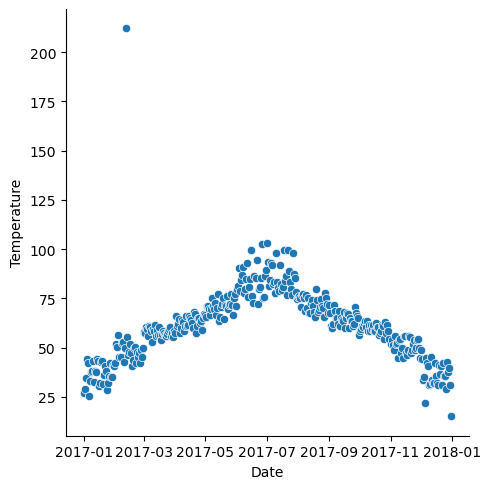

<Figure size 1000x800 with 0 Axes>

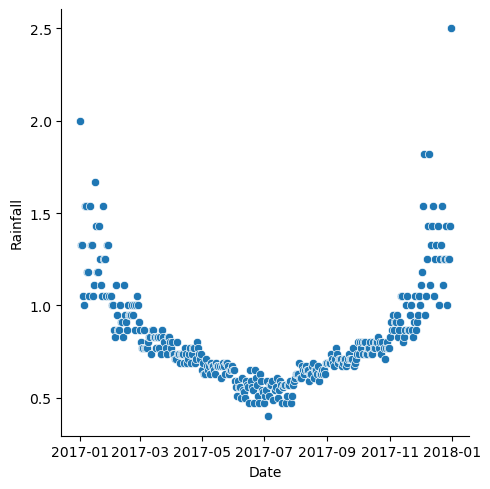

<Figure size 1000x800 with 0 Axes>

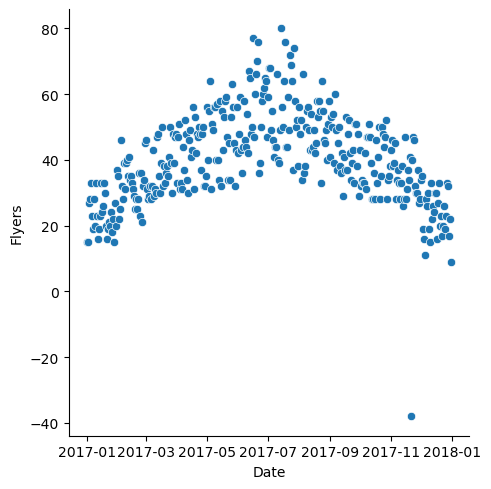

<Figure size 1000x800 with 0 Axes>

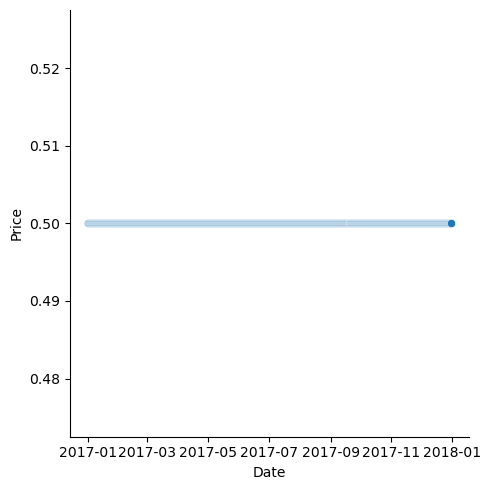

<Figure size 1000x800 with 0 Axes>

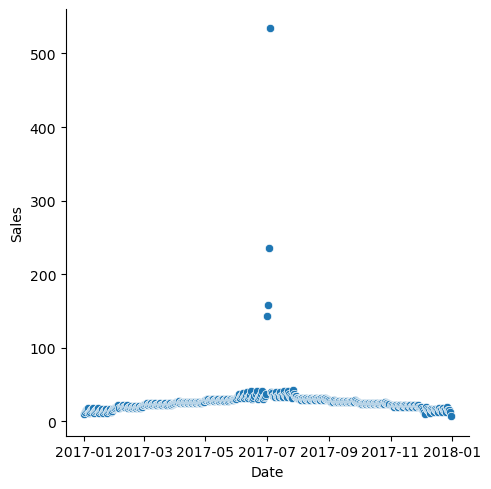

In [48]:
# plotting columns

for col in lem_list:
    
    plt.figure(figsize = (10, 8))
    sns.relplot(x = 'Date', y = col,  data = lem)


In [49]:
# temperature above 100

lem[lem.Temperature > 100]

,Day,Temperature,Rainfall,Flyers,Price,Sales,month,day,Temperature_upper_outliers,Temperature_lower_outliers,Rainfall_upper_outliers,Rainfall_lower_outliers,Flyers_upper_outliers,Flyers_lower_outliers,Price_upper_outliers,Price_lower_outliers,Sales_upper_outliers,Sales_lower_outliers
Date,,,,,,,,,,,,,,,,,,
2017-02-11,Saturday,212.0,0.91,35,0.5,21,2,11,1,0,0,0,0,0,0,0,0,0
2017-06-26,Monday,102.6,0.47,60,0.5,42,6,26,0,0,0,0,0,0,0,0,0,0
2017-07-01,Saturday,102.9,0.47,59,0.5,143,7,1,0,0,0,0,0,0,0,0,1,0


In [66]:
# looking at temp of surrounding days

lem.loc['2017-02-09':'2017-02-13']

,Day,Temperature,Rainfall,Flyers,Price,Sales,month,day,Temperature_upper_outliers,Temperature_lower_outliers,Rainfall_upper_outliers,Rainfall_lower_outliers,Flyers_upper_outliers,Flyers_lower_outliers,Price_upper_outliers,Price_lower_outliers,Sales_upper_outliers,Sales_lower_outliers
Date,,,,,,,,,,,,,,,,,,
2017-02-09,Thursday,42.7,1.00,39,0.5,19,2,9,0,0,0,0,0,0,0,0,0,0
2017-02-10,Friday,50.0,0.91,40,0.5,20,2,10,0,0,0,0,0,0,0,0,0,0
2017-02-11,Saturday,50.0,0.91,35,0.5,21,2,11,1,0,0,0,0,0,0,0,0,0
2017-02-12,Sunday,55.6,0.83,41,0.5,22,2,12,0,0,0,0,0,0,0,0,0,0
2017-02-13,Monday,46.4,1.11,34,0.5,18,2,13,0,0,0,0,0,0,0,0,0,0


In [67]:
# assigning the 212 temp to be the same as the 10th of FEb

lem.loc[lem.Temperature == 212, 'Temperature'] = lem.loc['2017-02-10'].Temperature

### flyers

In [99]:
# what is the index of the negative Flyer value ?

lem.Flyers.idxmin()

Timestamp('2017-11-21 00:00:00')

In [101]:
# look at dates around min flyer value

lem.loc['2017-11-19' : '2017-11-23']

,Day,Temperature,Rainfall,Flyers,Price,Sales,month,day,Temperature_upper_outliers,Temperature_lower_outliers,Rainfall_upper_outliers,Rainfall_lower_outliers,Flyers_upper_outliers,Flyers_lower_outliers,Price_upper_outliers,Price_lower_outliers,Sales_upper_outliers,Sales_lower_outliers
Date,,,,,,,,,,,,,,,,,,
2017-11-19,Sunday,55.9,0.87,34,0.5,23,11,19,0,0,0,0,0,0,0,0,0,0
2017-11-20,Monday,55.6,0.87,41,0.5,22,11,20,0,0,0,0,0,0,0,0,0,0
2017-11-21,Tuesday,47.0,0.95,-38,0.5,20,11,21,0,0,0,0,0,1,0,0,0,0
2017-11-22,Wednesday,48.7,1.00,40,0.5,19,11,22,0,0,0,0,0,0,0,0,0,0
2017-11-23,Thursday,51.9,0.87,47,0.5,23,11,23,0,0,0,0,0,0,0,0,0,0


In [103]:
# undoing negative values

lem.Flyers = lem.Flyers.abs()

In [ ]:
### flyers below Q1

lem[lem['Flyers'] < q1].value_counts().sum()


In [69]:
# what's the negative lfyers ?

# flyers below lower bound

lem[lem['Flyers'] < col_lower].value_counts().sum()

1

### sales

In [113]:
# where sales are above 50 cups

lem[lem.Sales > 50]

,Day,Temperature,Rainfall,Flyers,Price,Sales,month,day,Temperature_upper_outliers,Temperature_lower_outliers,Rainfall_upper_outliers,Rainfall_lower_outliers,Flyers_upper_outliers,Flyers_lower_outliers,Price_upper_outliers,Price_lower_outliers,Sales_upper_outliers,Sales_lower_outliers
Date,,,,,,,,,,,,,,,,,,
2017-07-01,Saturday,102.9,0.47,59,0.5,143,7,1,0,0,0,0,0,0,0,0,1,0
2017-07-02,Sunday,93.4,0.51,68,0.5,158,7,2,0,0,0,0,0,0,0,0,1,0
2017-07-03,Monday,81.5,0.54,68,0.5,235,7,3,0,0,0,0,0,0,0,0,1,0
2017-07-04,Tuesday,84.2,0.59,49,0.5,534,7,4,0,0,0,0,0,0,0,0,1,0


In [70]:
# finding number of rows in each col les than Q1 and below the lower bound

for col in lem_list:
    print(f'{col} less than Q1 : {lem[lem[col] < q1].value_counts().sum()}')
    print(f'{col} below the lower bound : {lem[lem[col] < col_lower].value_counts().sum()}')
    print()

Temperature less than Q1 : 11
Temperature below the lower bound : 0

Rainfall less than Q1 : 365
Rainfall below the lower bound : 365

Flyers less than Q1 : 86
Flyers below the lower bound : 1

Sales less than Q1 : 285
Sales below the lower bound : 0



In [72]:
# finding number of rows in each col greater than Q3 and above the upper bound

for col in lem_list:
    print(f'{col} greater than Q3 : {lem[lem[col] > q3].value_counts().sum()}')
    print(f'{col} above the upper bound : {lem[lem[col] > col_upper].value_counts().sum()}')
    print()

Temperature greater than Q3 : 276
Temperature above the upper bound : 64

Rainfall greater than Q3 : 0
Rainfall above the upper bound : 0

Flyers greater than Q3 : 87
Flyers above the upper bound : 2

Sales greater than Q3 : 4
Sales above the upper bound : 4



### 2/ Using the multiplier of 3, IQR Range Rule, and the lower bounds, identify the outliers below the lower bound in each colum of lemonade.csv. Do these lower outliers make sense? Which outliers should be kept?
        Using the multiplier of 3, IQR Range Rule, and the upper bounds, identify the outliers above the upper_bound in each colum of lemonade.csv. Do these upper outliers make sense? Which outliers should be kept?

In [55]:
# upper, lower, quantiles for columns

lem_list = ['Temperature', 'Rainfall', 'Flyers', 'Sales']

for col in lem_list:
    
    print(get_lower_and_upper_bounds(lem, col, k = 3))

Temperature, Q1 : 49.7, Q3 : 71.7, Column lower bound : -16.3, Column upper bound : 137.7
Rainfall, Q1 : 0.65, Q3 : 0.91, Column lower bound : -0.13, Column upper bound : 1.69
Flyers, Q1 : 31.0, Q3 : 49.0, Column lower bound : -23.0, Column upper bound : 103.0
Sales, Q1 : 20.0, Q3 : 30.0, Column lower bound : -10.0, Column upper bound : 60.0


In [34]:
q1, q3

(31.0, 49.0)

In [91]:
# finding number of rows in each col les than Q1 and below the lower bound, k = 3

for col in lem_list:
    print(f'Number of {col} rows less than Q1 : {lem[lem[col] < q1].value_counts().sum()}')
    print(f'Number of {col} rows below the lower bound : {lem[lem[col] < col_lower].value_counts().sum()}')
    print()

Number of Temperature rows less than Q1 : 11
Number of Temperature rows below the lower bound : 0

Number of Rainfall rows less than Q1 : 365
Number of Rainfall rows below the lower bound : 365

Number of Flyers rows less than Q1 : 86
Number of Flyers rows below the lower bound : 1

Number of Price rows less than Q1 : 365
Number of Price rows below the lower bound : 365

Number of Sales rows less than Q1 : 285
Number of Sales rows below the lower bound : 0



In [93]:
# finding number of rows in each col greater than Q3 and above the upper bound

for col in lem_list:
    print(f'Number of {col} rows greater than Q3 : {lem[lem[col] > q3].value_counts().sum()}')
    print(f'Number of {col} rows above the upper bound : {lem[lem[col] > col_upper].value_counts().sum()}')
    print()

Number of Temperature rows greater than Q3 : 276
Number of Temperature rows above the upper bound : 64

Number of Rainfall rows greater than Q3 : 0
Number of Rainfall rows above the upper bound : 0

Number of Flyers rows greater than Q3 : 87
Number of Flyers rows above the upper bound : 2

Number of Price rows greater than Q3 : 0
Number of Price rows above the upper bound : 0

Number of Sales rows greater than Q3 : 4
Number of Sales rows above the upper bound : 4



### 3/         Use a 2-sigma decision rule to isolate the outliers.
            Do these make sense?  
            
**The temperature outliers make sense : They occur in July, and, based on the source of the information, I'm assuming that it's for data from North America. The only outliers that don't make sense are the two 'Sales' counts for 2017-07-03 of 235, and 2017-07-04 of 534, as those are quite high and would require selling 29 cups and 67 cups per hour, respectively.**  
            
            Should certain outliers be kept or removed?

**More research would be needed before answering : perhaps multiple people were selling the lemonade at a time, perhaps there was a special event, perhaps it's a typing error.**

In [104]:
def calc_zscore(df, my_list):
    
    # calculate z-score for each item in teh array

    for col in my_list:
    
        zscore = pd.Series((df[col] - df[col].mean())) / df[col].std()

        print(f'{col} zscore {zscore}.')
        print()

In [109]:
# calculate z-score for each item in the array

for col in lem_list:
    
    zscore = pd.Series((lem[col] - lem[col].mean())) / lem[col].std()
    
    print(f'{col} zscore {zscore}.')
    print()

Temperature zscore Date
2017-01-01   -2.075945
2017-01-02   -1.959184
2017-01-03   -1.615045
2017-01-04   -1.025093
2017-01-05   -1.129564
                ...   
2017-12-27   -1.111128
2017-12-28   -1.412249
2017-12-29   -1.307778
2017-12-30   -1.836277
2017-12-31   -2.807241
Name: Temperature, Length: 365, dtype: float64.

Rainfall zscore Date
2017-01-01    4.286488
2017-01-02    1.840253
2017-01-03    1.840253
2017-01-04    0.817946
2017-01-05    0.635391
                ...   
2017-12-27    0.635391
2017-12-28    1.548165
2017-12-29    1.548165
2017-12-30    2.205363
2017-12-31    6.112037
Name: Rainfall, Length: 365, dtype: float64.

Flyers zscore Date
2017-01-01   -1.922928
2017-01-02   -1.922928
2017-01-03   -1.011312
2017-01-04   -0.935344
2017-01-05   -0.555503
                ...   
2017-12-27   -0.555503
2017-12-28   -0.631471
2017-12-29   -1.770992
2017-12-30   -1.391152
2017-12-31   -2.378737
Name: Flyers, Length: 365, dtype: float64.

Sales zscore Date
2017-01-01   -0.5772

In [110]:
# find all observations outside of 2 std deviations (greater than inside the 95th percentile)
for col in lem_list:
    
    out_2_std = lem[col][zscore.abs() >= 2]
    
    print(f'{col} {out_2_std}.')
    print()

Temperature Date
2017-07-01    102.9
2017-07-02     93.4
2017-07-03     81.5
2017-07-04     84.2
Name: Temperature, dtype: float64.

Rainfall Date
2017-07-01    0.47
2017-07-02    0.51
2017-07-03    0.54
2017-07-04    0.59
Name: Rainfall, dtype: float64.

Flyers Date
2017-07-01    59
2017-07-02    68
2017-07-03    68
2017-07-04    49
Name: Flyers, dtype: int64.

Sales Date
2017-07-01    143
2017-07-02    158
2017-07-03    235
2017-07-04    534
Name: Sales, dtype: int64.



### 4/     Now use a 3-sigma decision rule to isolate the outliers in the normally distributed columns from lemonade.csv

In [111]:
# find all observations outside of 3 std deviations (greater than inside the 99.7th percentile)
for col in lem_list:
    
    out_3_std = lem[col][zscore.abs() >= 3]
    
    print(f'{col} {out_3_std}.')
    print()

Temperature Date
2017-07-01    102.9
2017-07-02     93.4
2017-07-03     81.5
2017-07-04     84.2
Name: Temperature, dtype: float64.

Rainfall Date
2017-07-01    0.47
2017-07-02    0.51
2017-07-03    0.54
2017-07-04    0.59
Name: Rainfall, dtype: float64.

Flyers Date
2017-07-01    59
2017-07-02    68
2017-07-03    68
2017-07-04    49
Name: Flyers, dtype: int64.

Sales Date
2017-07-01    143
2017-07-02    158
2017-07-03    235
2017-07-04    534
Name: Sales, dtype: int64.



In [115]:

# this creates a dictinoary containing all of the outliers.
# tis then possible to call up a df with only the outliers in a given column

if np.issubdtype(lem[col].dtype, np.number):
# this gets only the numeric columns
    col_lower, col_upper